In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import itertools


In [20]:
# Ganti path file CSV dengan path yang sesuai
data = pd.read_csv(r"C:\STUDI INDEPENDEN\DATA ANALIST - STUPEN\SESI-3\Motor+Vehicle+Thefts+CSV\stolen_vehicles.csv")
data.head(30)

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102.0
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105.0
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102.0
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106.0
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102.0
5,6,Roadbike,636.0,2005.0,YZF-R6T,Black,12/31/21,102.0
6,7,Trailer,623.0,2021.0,CAAR TRANSPORTER,Silver,11/12/21,114.0
7,8,Boat Trailer,623.0,2001.0,BOAT,Silver,2/22/22,109.0
8,"9,Trailer,514,2021,""7X4-6"""" 1000KG"",Silver,2/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Trailer,514.0,2020.0,8X4 TANDEM,Silver,1/3/22,114.0


In [9]:
data['date_stolen'] = pd.to_datetime(data['date_stolen'])

In [21]:
data.isna().sum()

vehicle_id       0
vehicle_type     3
make_id          3
model_year       3
vehicle_desc    20
color            3
date_stolen      3
location_id      3
dtype: int64

In [31]:
columns_to_clean = ['vehicle_id', 'vehicle_type', 'make_id', 'model_year', 'vehicle_desc', 'color', 'date_stolen', 
                    'location_id']
data = data.dropna(subset=columns_to_clean)

In [32]:
data.isna().sum()

vehicle_id      0
vehicle_type    0
make_id         0
model_year      0
vehicle_desc    0
color           0
date_stolen     0
location_id     0
dtype: int64

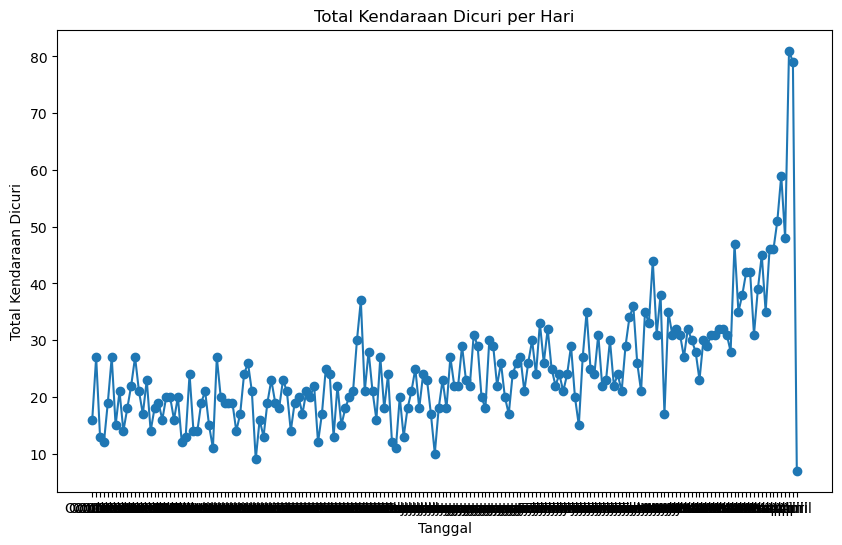

In [252]:
# Membuat plot time series
plt.figure(figsize=(10, 6))
plt.plot(data['date_stolen'], data['total_kendaraan_dicuri'], marker='o')
plt.title('Total Kendaraan Dicuri per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Kendaraan Dicuri')

# Mengonversi sumbu x menjadi pandas.Series dan kemudian menampilkan bulan
dates = pd.Series(data['date_stolen']).dt.strftime('%B')
plt.xticks(data['date_stolen'], dates)

plt.grid(False)
plt.show()

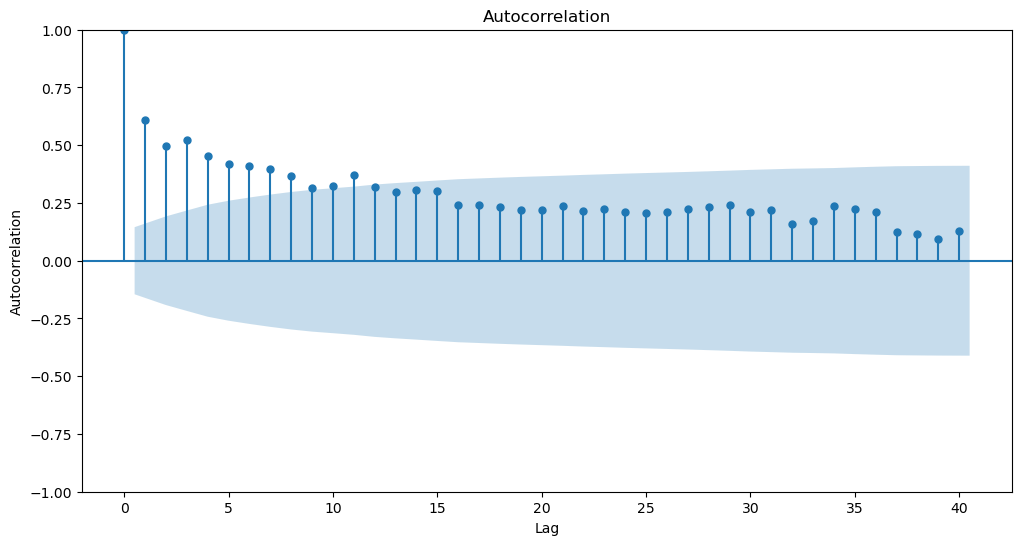

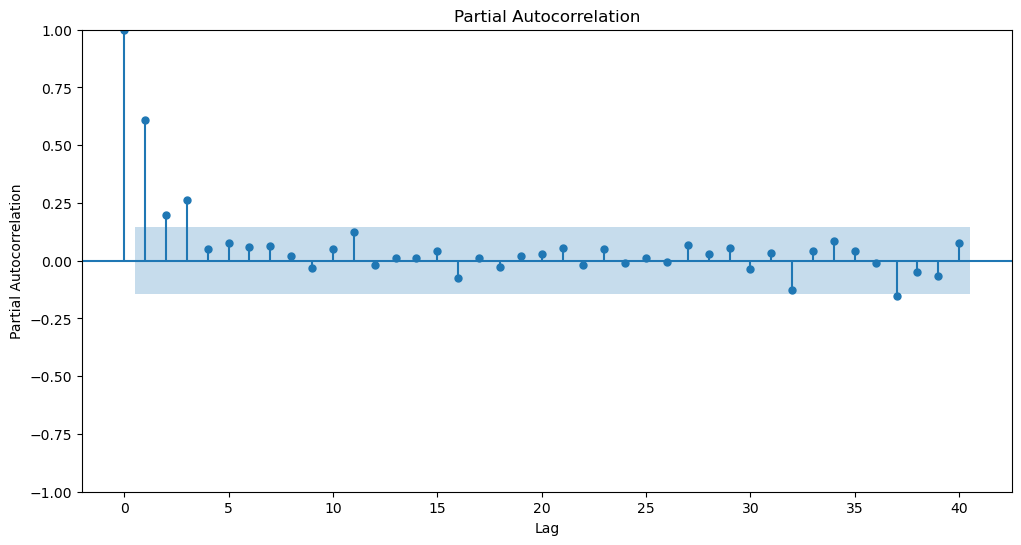

In [253]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Melakukan plot Autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(actual['total_kendaraan_dicuri'], lags=40, ax=plt.gca())
plt.title('Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Melakukan plot Partial Autocorrelation
plt.figure(figsize=(12, 6))
plot_pacf(actual['total_kendaraan_dicuri'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


In [254]:
data.set_index('date_stolen', inplace=True)

# Train-test split
train = data.iloc[:-30]  # Ambil data historis sebagai data latih
test = data.iloc[-30:]   # Ambil 30 hari terakhir sebagai data uji


In [255]:
# Training ARIMA model
model = ARIMA(train, order=(2,1,2))  # Contoh order ARIMA (p,d,q)
model_fit = model.fit()


C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

In [256]:
# Forecast
forecast = model_fit.forecast(steps=30)  # Prediksi 30 hari ke depan


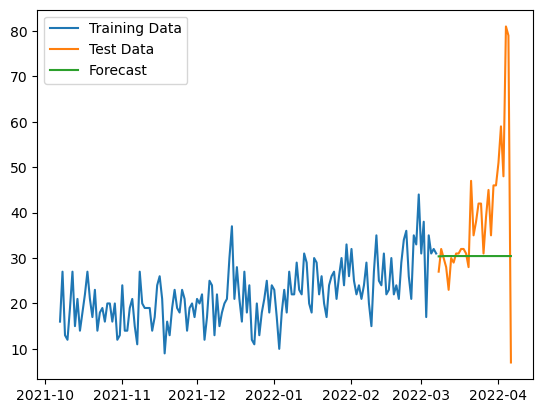

In [257]:
# Visualisasi prediksi
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()


C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


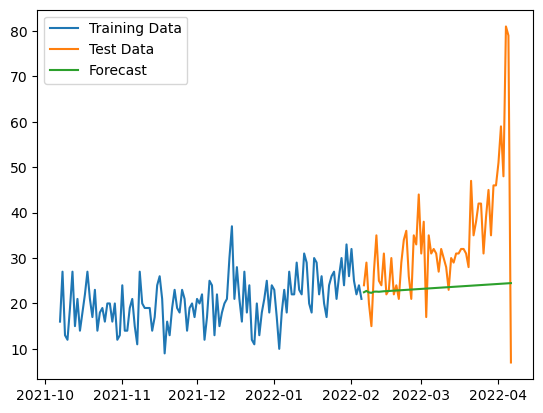

In [258]:
# Train-test split
train = data.iloc[:-60]  # Ambil data historis sebagai data latih
test = data.iloc[-60:]   # Ambil 30 hari terakhir sebagai data uji


model = ARIMA(train, order=(3,2,1))  # Contoh order ARIMA (p,d,q)
model_fit = model.fit()
# Forecast
forecast = model_fit.forecast(steps=60)  # Prediksi 30 hari ke depan
# Visualisasi prediksi
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

In [260]:
train_proportion = 0.8

# Hitung jumlah baris untuk data latih berdasarkan proporsi
train_size = int(len(data) * train_proportion)

# Bagi data menjadi data latih dan data uji
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [261]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12) 

In [262]:
# Konversi tipe data DataFrame menjadi tipe data numerik
train_data = train_data.astype(float)


In [263]:
# Membuat dan melatih model SARIMAX
model = sm.tsa.statespace.SARIMAX(train_data, order=order, seasonal_order=seasonal_order,
                                  enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\DATA SCIENCE\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


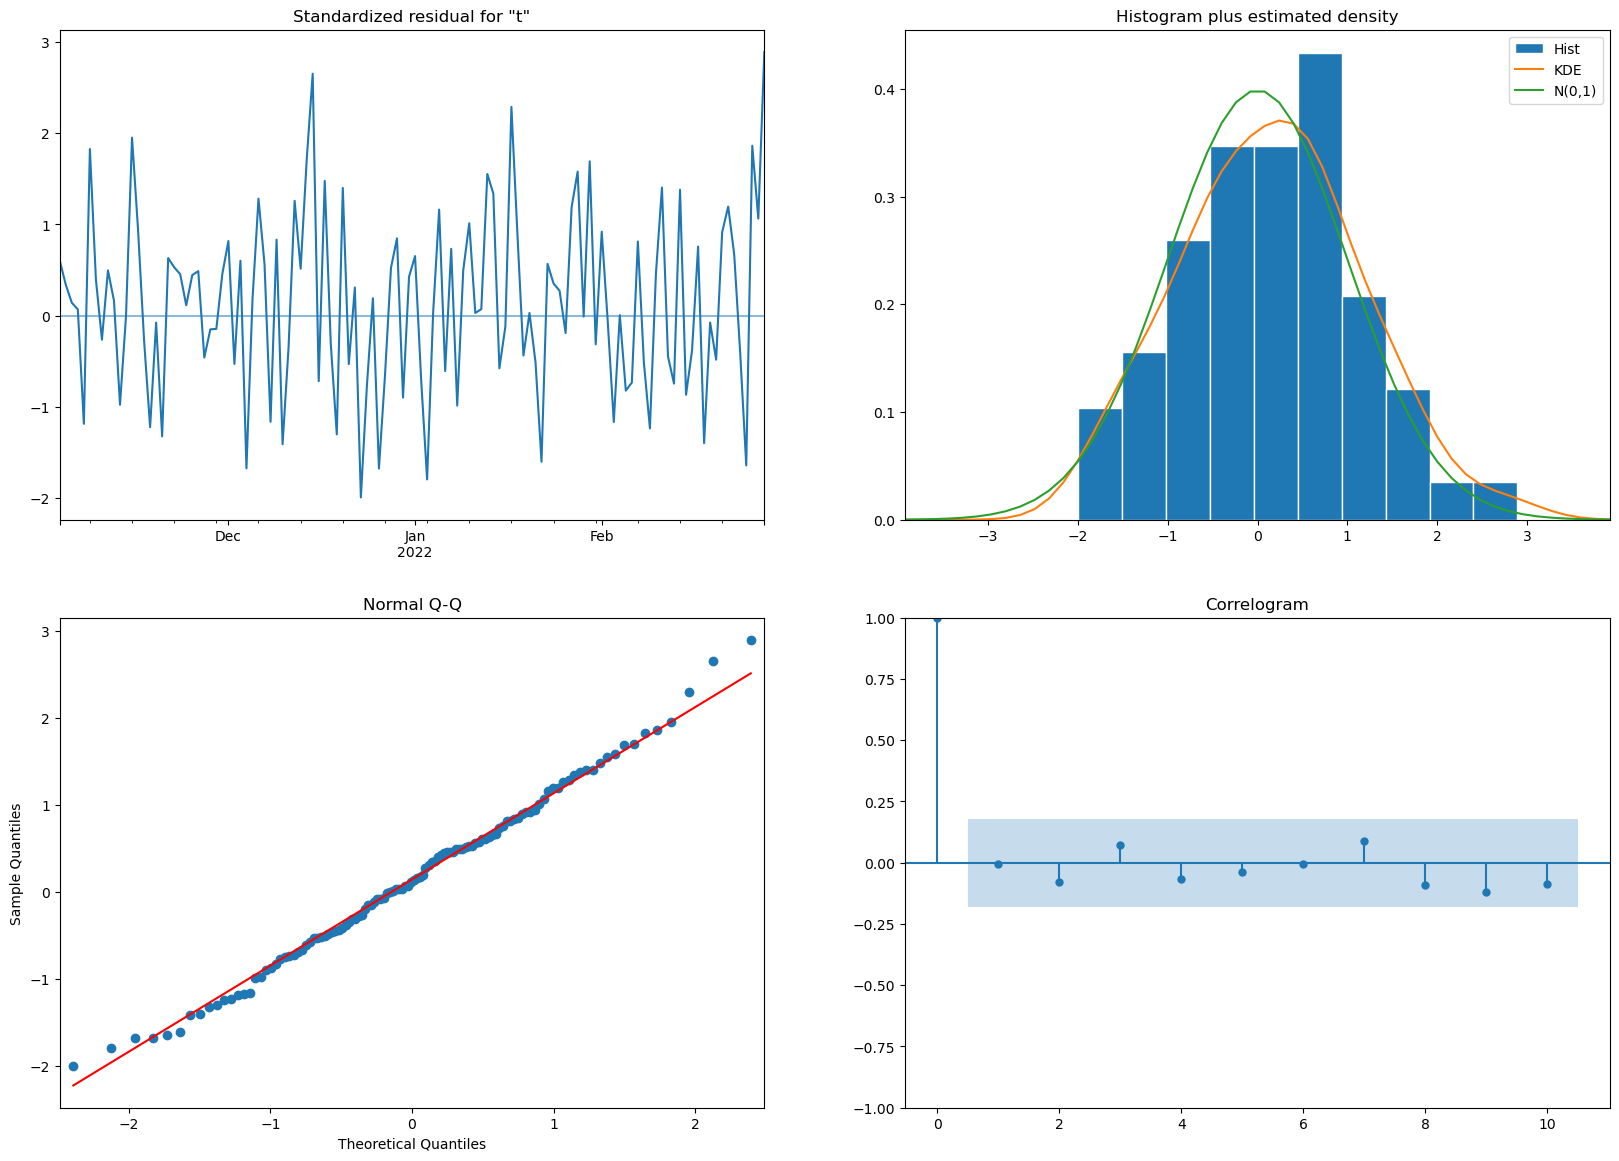

In [264]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [265]:
pred0 = results.get_prediction(start=train_data.index[0], dynamic=False)
pred0_ci = pred0.conf_int()

In [266]:
pred1 = results.get_prediction(start=train_data.index[0], dynamic=True)
pred1_ci = pred1.conf_int()

In [274]:
# Menjalankan metode get_forecast() dengan tanggal '2022-12-06'
pred2 = results.get_forecast('2022-5-06')

# Memperoleh interval kepercayaan untuk prediksi
pred2_ci = pred2.conf_int()

# Mencetak nilai prediksi untuk rentang waktu tertentu, misalnya '1960-01-01' hingga '1960-12-01'
print(pred2.predicted_mean['2022-04-06':'2022-5-06'])


2022-04-06    33.809886
2022-04-07    32.635037
2022-04-08    32.675616
2022-04-09    29.037444
2022-04-10    30.692099
2022-04-11    35.730895
2022-04-12    40.036610
2022-04-13    33.036843
2022-04-14    32.717875
2022-04-15    36.715033
2022-04-16    33.678731
2022-04-17    37.632116
2022-04-18    35.272539
2022-04-19    34.109207
2022-04-20    34.128921
2022-04-21    30.484965
2022-04-22    32.093149
2022-04-23    37.132195
2022-04-24    41.454720
2022-04-25    34.476832
2022-04-26    34.192003
2022-04-27    38.116210
2022-04-28    35.072351
2022-04-29    38.974344
2022-04-30    36.694077
2022-05-01    35.527582
2022-05-02    35.553027
2022-05-03    31.910659
2022-05-04    33.531606
2022-05-05    38.570583
2022-05-06    42.888492
Freq: D, Name: predicted_mean, dtype: float64


In [275]:
summary = pred2.summary_frame()
print(summary)

total_kendaraan_dicuri       mean   mean_se  mean_ci_lower  mean_ci_upper
2022-03-01              30.765654  5.527193      19.932555      41.598752
2022-03-02              30.036019  5.651145      18.959979      41.112059
2022-03-03              29.270003  5.667412      18.162079      40.377927
2022-03-04              25.408230  5.675363      14.284722      36.531738
2022-03-05              25.266427  5.682176      14.129567      36.403287
...                           ...       ...            ...            ...
2022-05-02              35.553027  7.969488      19.933117      51.172936
2022-05-03              31.910659  7.996010      16.238768      47.582550
2022-05-04              33.531606  8.021908      17.808954      49.254257
2022-05-05              38.570583  8.047633      22.797513      54.343653
2022-05-06              42.888492  8.073259      27.065194      58.711789

[67 rows x 4 columns]


In [269]:
# Memeriksa rentang tanggal dalam indeks data
print("Tanggal awal:", data.index.min())
print("Tanggal akhir:", data.index.max())


Tanggal awal: 2021-10-07 00:00:00
Tanggal akhir: 2022-04-06 00:00:00


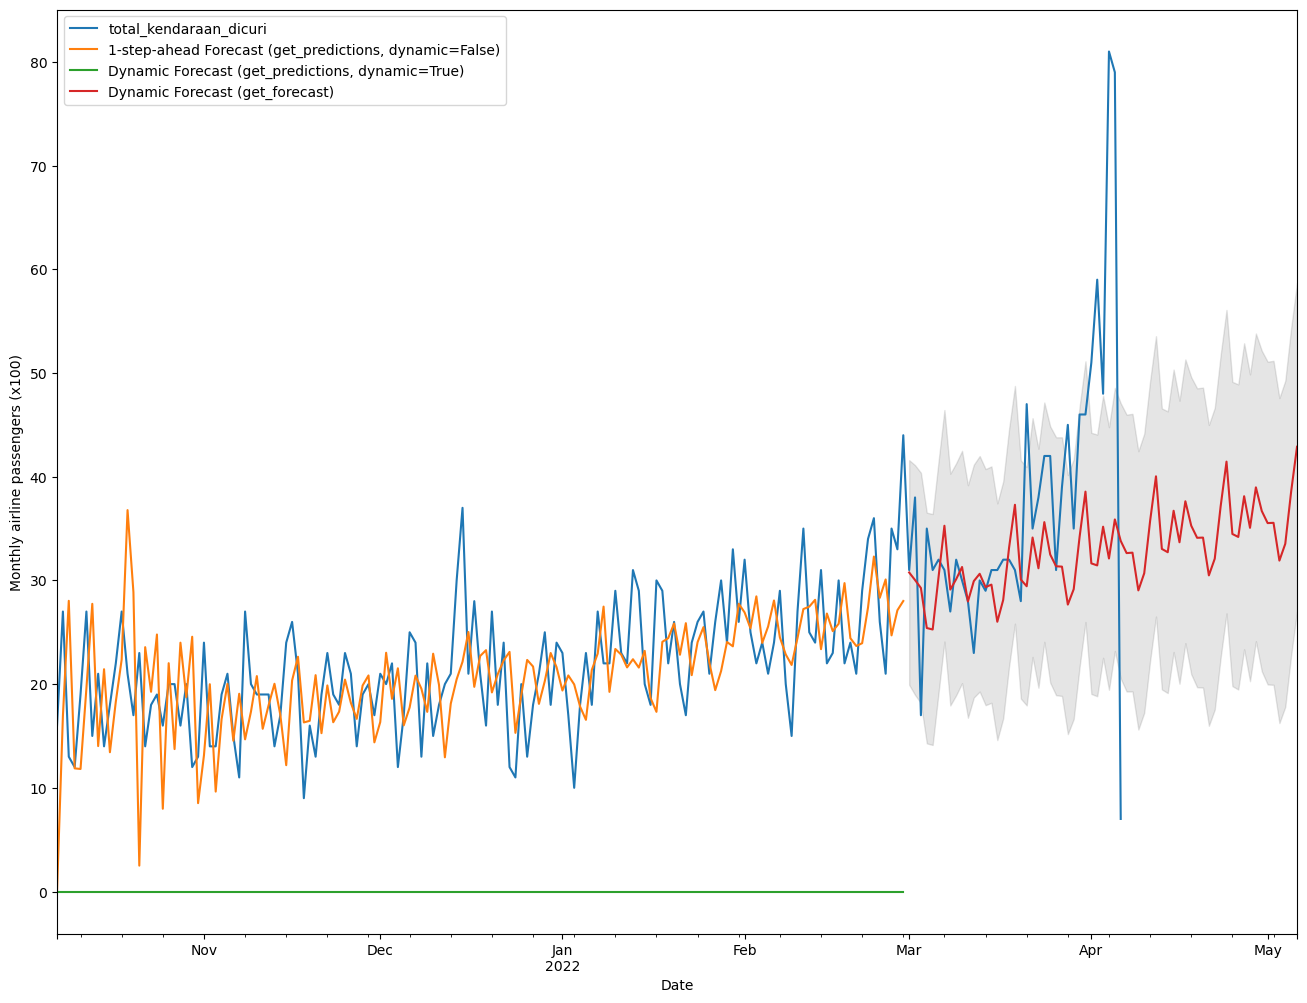

In [277]:
ax = data.plot(figsize=(16, 12))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passengers (x100)')
plt.xlabel('Date')
plt.legend()
plt.show()

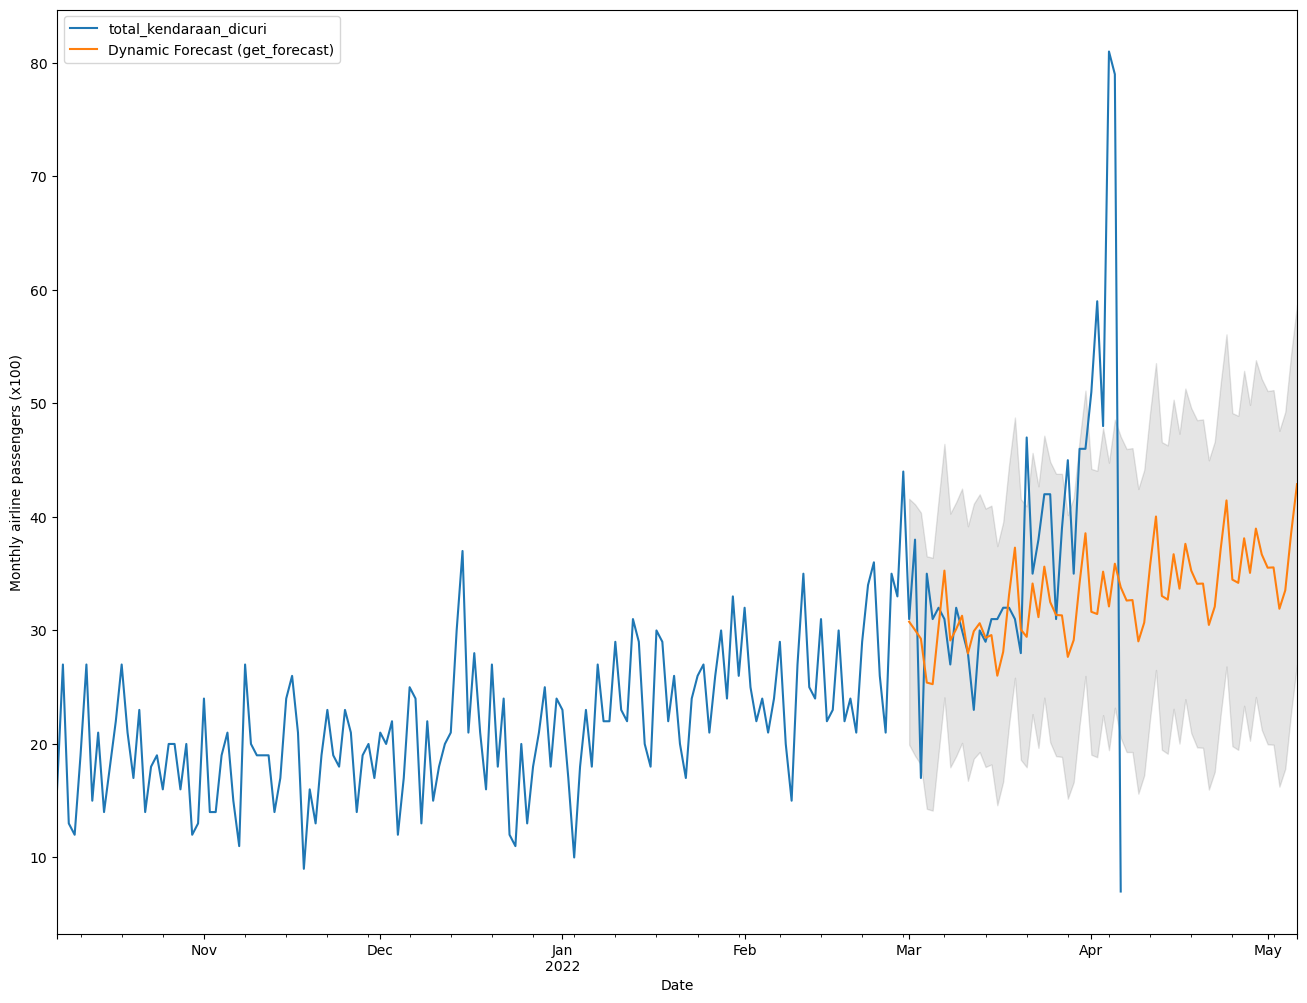

In [279]:
ax = data.plot(figsize=(16, 12))
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passengers (x100)')
plt.xlabel('Date')
plt.legend()
plt.show()

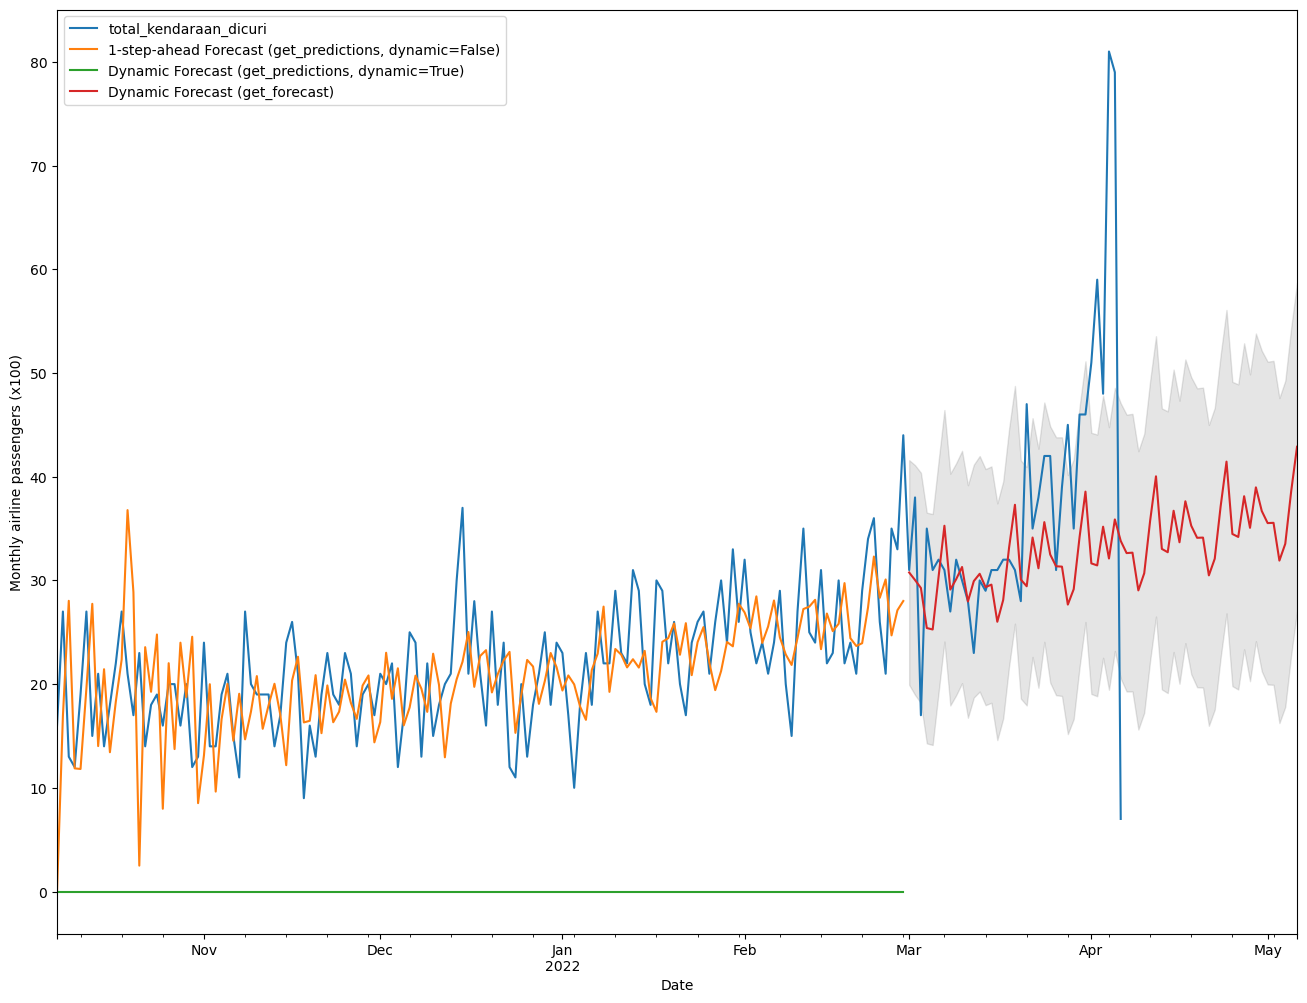

In [284]:
ax = data.plot(figsize=(16, 12))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passengers (x100)')
plt.xlabel('Date')
plt.legend()
plt.show()